In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv(r"D:\Data set\UberDataset.csv")

In [4]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
dataset.shape

(1156, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [8]:
dataset['PURPOSE'].fillna("Not",inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7484\3622719247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("Not",inplace=True)


In [9]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [13]:
from datetime import datetime

dataset['data'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [14]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06
...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT


In [15]:
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [16]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN


In [17]:
dataset['day-night'] = pd.cut(x=dataset['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [18]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN,NaN


In [19]:
dataset.dropna(inplace=True)

In [21]:
dataset.shape

(413, 10)

In [22]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


# Data Visualization

<Axes: xlabel='PURPOSE', ylabel='count'>

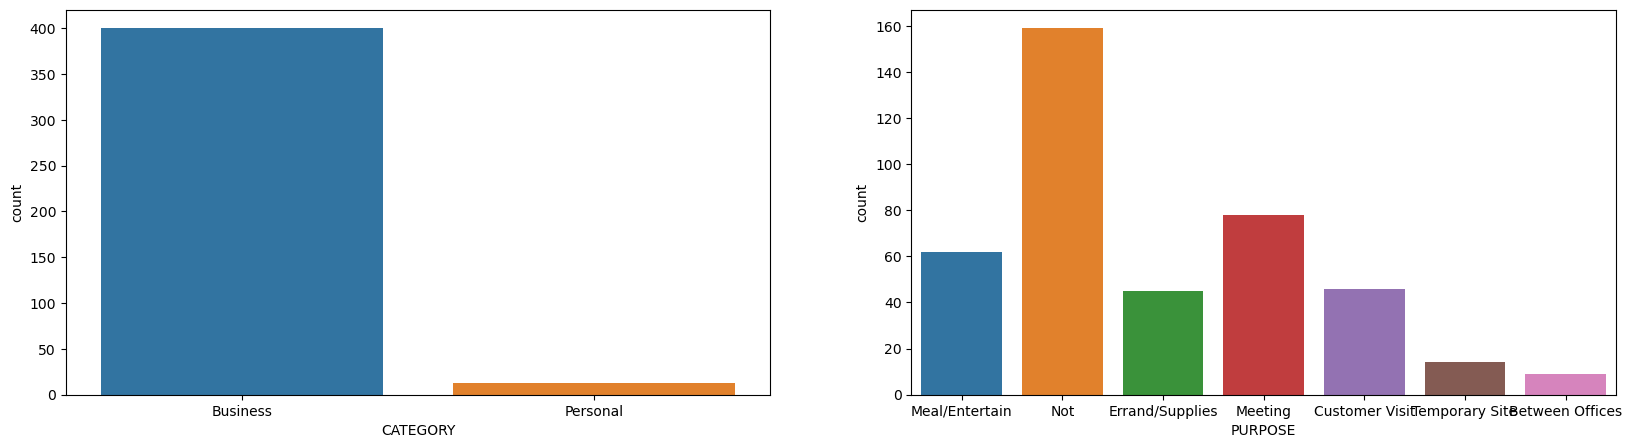

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset)

plt.subplot(1,2,2)
sns.countplot(x='PURPOSE',data=dataset)


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day-night', ylabel='count'>

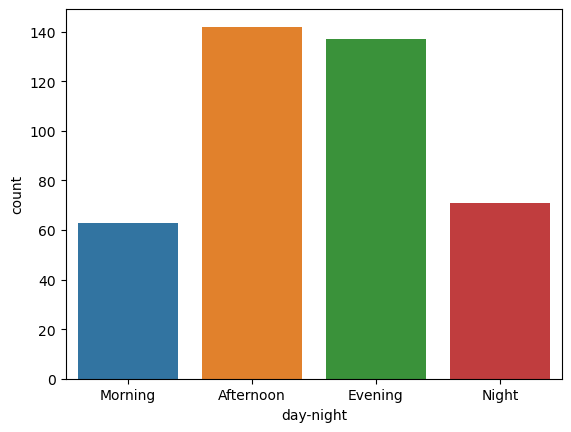

In [27]:
sns.countplot(x='day-night',data=dataset)

In [33]:
dataset['Month'] = pd.to_datetime(dataset['START_DATE']).dt.month


In [34]:
month_label= {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'April',5.0:'May',6.0:'June',
             7.0:'July',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}

dataset['Month'] = dataset.Month.map(month_label)
mon = dataset.Month.value_counts(sort=False)

In [35]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan
...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,Dec
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,Dec
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,Dec
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,Dec


In [36]:
df = pd.DataFrame({
    'Months':mon.values,
    'Value Count':dataset.groupby('Month',sort=False)['MILES'].max()
})

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Value Count')]

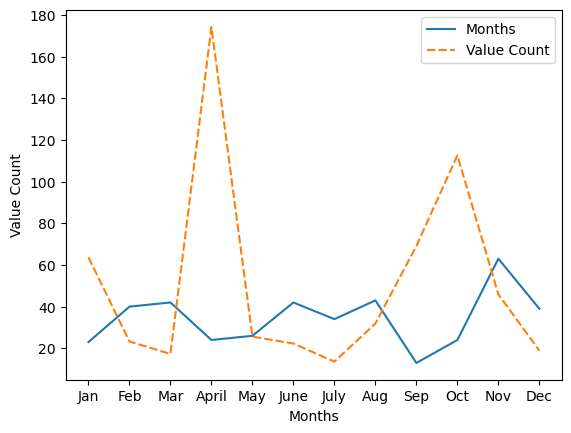

In [37]:
p = sns.lineplot(data=df)
p.set(xlabel = 'Months',ylabel = "Value Count")

In [38]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [40]:
dataset['Day'] = dataset.START_DATE.dt.weekday

data_label = {
    0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'
}
dataset['Day'] = dataset['Day'].map(data_label)

In [41]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


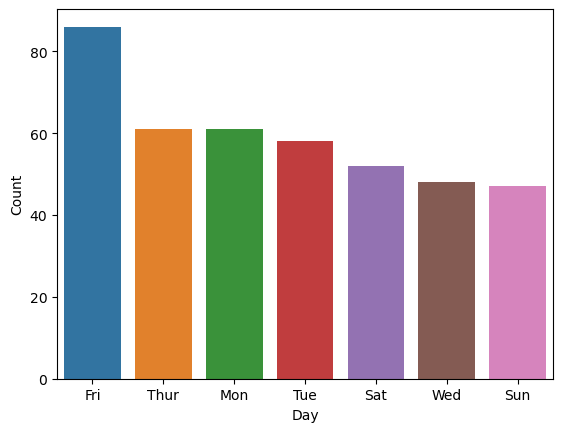

In [45]:
data_label = dataset.Day.value_counts()
sns.barplot(x=data_label.index, y =data_label)
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


<Axes: ylabel='MILES'>

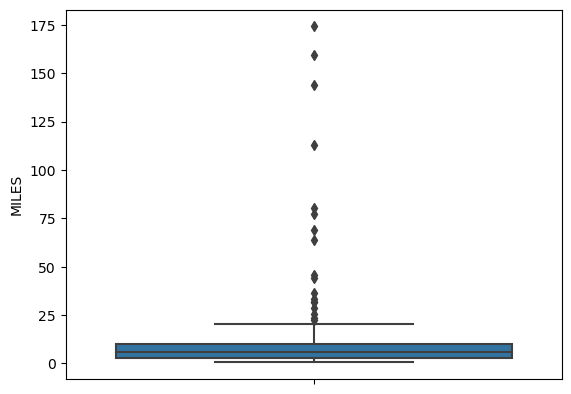

In [48]:
sns.boxplot(y='MILES',data = dataset)

<Axes: >

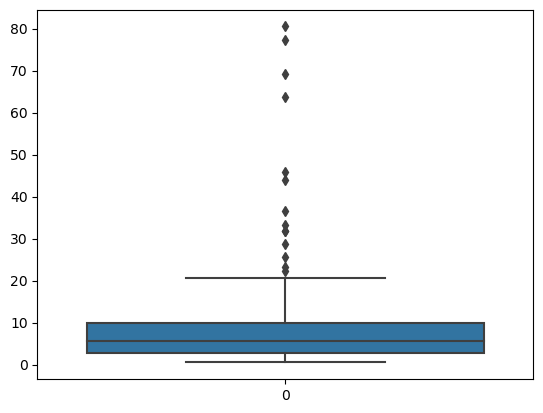

In [50]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: >

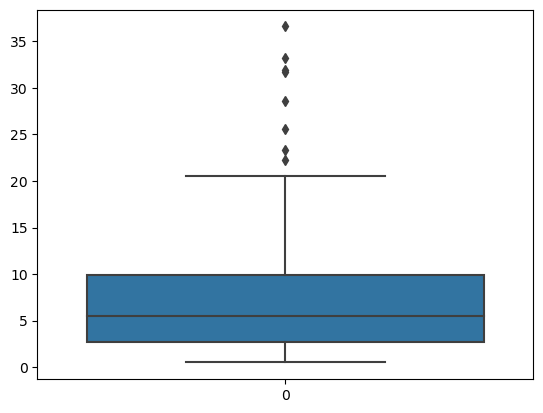

In [52]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])

In [55]:
sns.displot(x = 'MILES',dataset[dataset['MILES']<40]['MILES'])

SyntaxError: positional argument follows keyword argument (588299805.py, line 1)

In [53]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,data,time,day-night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,Dec,Mon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,Dec,Mon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,Dec,Mon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,Dec,Mon


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


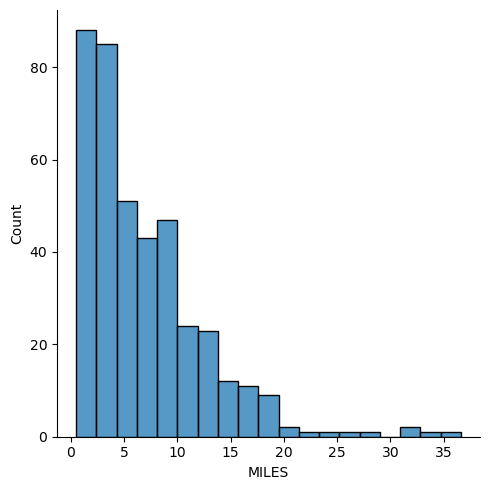

In [56]:
sns.displot(data=dataset[dataset['MILES'] < 40], x='MILES')


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


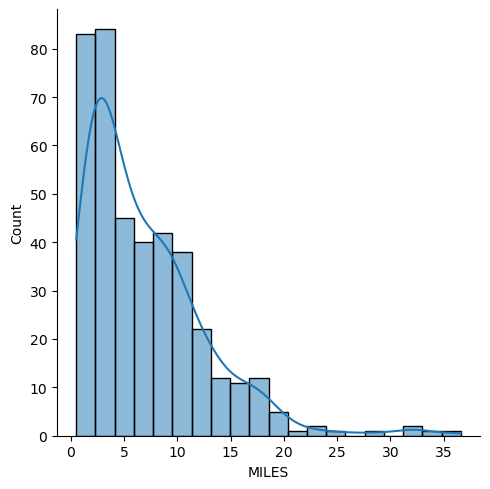

In [57]:
sns.displot(data=dataset[dataset['MILES'] < 40], x='MILES', bins=20, kde=True)
